<a href="https://colab.research.google.com/github/sanjanb/Pranayama-reduces-BP-or-Not/blob/main/Pranayama_reduces_BP_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pranayama reduces BP or Not**

## **Data Loading**

In [29]:
import pandas as pd

excel_file_path = '/content/Pranayama_Datset.xlsx'
xls = pd.ExcelFile(excel_file_path)
df = xls.parse('Sheet1')
df = df.drop('Name', axis=1)
df = df.drop('Contact Number', axis=1)
df.head()

,Age,Weight,Gender,D1 Before Pranayama BP Measurment,D1 Before Pranayama PULSE,D1 After Pranayama BP Measurment,D1 After Pranayama PULSE,D2 Before Pranayama BP Measurment,D2 Before Pranayama PULSE,D2 After Pranayama BP Measurment,D2 After Pranayama PULSE,D3 Before Pranayama BP Measurment,D3 Before Pranayama PULSE,D3 After Pranayama BP Measurment,D3 After Pranayama PULSE
0,30,68.0,F,122/79,83.0,118/77,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74,76.0,M,148/74,74.0,163/80,74.0,154/74,73.0,160/75,80.0,NaN,NaN,NaN,NaN
2,62,64.0,M,131/76,88.0,124/76,80.0,121/76,92.0,121/70,92.0,142/78,91.0,133/73,83.0
3,53,70.0,F,125/70,87.0,116/74,80.0,128/71,85.0,123/72,89.0,123/66,69.0,118/72,83.0
4,63,74.0,M,118/65,55.0,104/68,52.0,118/70,59.0,118/69,56.0,115/73,55.0,106/65,53.0


## **Data cleaning and splitting into systolic and diastolic**

In [4]:
import numpy as np


def split_bp(bp_str):
    try:
        systolic, diastolic = map(int, bp_str.split('/'))
        return systolic, diastolic
    except:
        return np.nan, np.nan

for day in ['D1', 'D2', 'D3']:
    for time in ['Before', 'After']:
        bp_col = f'{day} {time} Pranayama BP Measurment'
        df[[f'{bp_col} Systolic', f'{bp_col} Diastolic']] = df[bp_col].apply(lambda x: pd.Series(split_bp(str(x))))

bp_cols_to_drop = [col for col in df.columns if 'BP Measurment' in col and 'Systolic' not in col and 'Diastolic' not in col]
df_cleaned = df.drop(columns=bp_cols_to_drop)

df_cleaned = df_cleaned.dropna().drop_duplicates()

df_cleaned.head()


,Age,Weight,Gender,Contact Number,D1 Before Pranayama PULSE,D1 After Pranayama PULSE,D2 Before Pranayama PULSE,D2 After Pranayama PULSE,D3 Before Pranayama PULSE,D3 After Pranayama PULSE,...,D1 After Pranayama BP Measurment Systolic,D1 After Pranayama BP Measurment Diastolic,D2 Before Pranayama BP Measurment Systolic,D2 Before Pranayama BP Measurment Diastolic,D2 After Pranayama BP Measurment Systolic,D2 After Pranayama BP Measurment Diastolic,D3 Before Pranayama BP Measurment Systolic,D3 Before Pranayama BP Measurment Diastolic,D3 After Pranayama BP Measurment Systolic,D3 After Pranayama BP Measurment Diastolic
2,62,64.0,M,9.740905e+09,88.0,80.0,92.0,92.0,91.0,83.0,...,124.0,76.0,121.0,76.0,121.0,70.0,142.0,78.0,133.0,73.0
3,53,70.0,F,9.379414e+09,87.0,80.0,85.0,89.0,69.0,83.0,...,116.0,74.0,128.0,71.0,123.0,72.0,123.0,66.0,118.0,72.0
4,63,74.0,M,9.844683e+09,55.0,52.0,59.0,56.0,55.0,53.0,...,104.0,68.0,118.0,70.0,118.0,69.0,115.0,73.0,106.0,65.0
5,61,70.0,F,9.845377e+09,60.0,80.0,65.0,58.0,56.0,53.0,...,121.0,74.0,122.0,71.0,111.0,67.0,109.0,69.0,111.0,61.0
6,59,77.0,F,9.731679e+09,89.0,83.0,97.0,87.0,93.0,83.0,...,122.0,82.0,138.0,85.0,128.0,85.0,133.0,78.0,127.0,73.0


## **Import packages and libraries**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

### **Create Target Variables**

In [8]:
df_ml = df_cleaned.copy()
df_ml['BP_Decreased'] = (df_ml['D1 After Pranayama BP Measurment Systolic'] <
                         df_ml['D1 Before Pranayama BP Measurment Systolic']).astype(int)

print(df_ml.columns)



Index(['Age ', 'Weight', 'Gender', 'Contact Number',
       'D1 Before Pranayama PULSE ', 'D1 After Pranayama PULSE ',
       'D2 Before Pranayama PULSE ', 'D2 After Pranayama PULSE ',
       'D3 Before Pranayama PULSE ', 'D3 After Pranayama PULSE ',
       'D1 Before Pranayama BP Measurment Systolic',
       'D1 Before Pranayama BP Measurment Diastolic',
       'D1 After Pranayama BP Measurment Systolic',
       'D1 After Pranayama BP Measurment Diastolic',
       'D2 Before Pranayama BP Measurment Systolic',
       'D2 Before Pranayama BP Measurment Diastolic',
       'D2 After Pranayama BP Measurment Systolic',
       'D2 After Pranayama BP Measurment Diastolic',
       'D3 Before Pranayama BP Measurment Systolic',
       'D3 Before Pranayama BP Measurment Diastolic',
       'D3 After Pranayama BP Measurment Systolic',
       'D3 After Pranayama BP Measurment Diastolic', 'BP_Decreased'],
      dtype='object')


### **Feature Selection**

In [12]:
features = ['Age ', 'Weight', 'Gender', 'Contact Number',
       'D1 Before Pranayama PULSE ', 'D1 After Pranayama PULSE ',
       'D2 Before Pranayama PULSE ', 'D2 After Pranayama PULSE ',
       'D3 Before Pranayama PULSE ', 'D3 After Pranayama PULSE ',
       'D1 Before Pranayama BP Measurment Systolic',
       'D1 Before Pranayama BP Measurment Diastolic',
       'D1 After Pranayama BP Measurment Systolic',
       'D1 After Pranayama BP Measurment Diastolic',
       'D2 Before Pranayama BP Measurment Systolic',
       'D2 Before Pranayama BP Measurment Diastolic',
       'D2 After Pranayama BP Measurment Systolic',
       'D2 After Pranayama BP Measurment Diastolic',
       'D3 Before Pranayama BP Measurment Systolic',
       'D3 Before Pranayama BP Measurment Diastolic',
       'D3 After Pranayama BP Measurment Systolic',
       'D3 After Pranayama BP Measurment Diastolic', 'BP_Decreased']

X = df_ml[features].copy()
y = df_ml['BP_Decreased']

# Encode categorical data
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

### **Feature Scaling & Train-Test Split**

In [15]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### **Train multiple models**

In [16]:
models = {    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        "confusion_matrix": confusion_matrix(y_test, preds),
        "classification_report": classification_report(y_test, preds, output_dict=True)
    }

results

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'Logistic Regression': {'confusion_matrix': array([[1, 0],
         [1, 2]]),
  'classification_report': {'0': {'precision': 0.5,
    'recall': 1.0,
    'f1-score': 0.6666666666666666,
    'support': 1.0},
   '1': {'precision': 1.0,
    'recall': 0.6666666666666666,
    'f1-score': 0.8,
    'support': 3.0},
   'accuracy': 0.75,
   'macro avg': {'precision': 0.75,
    'recall': 0.8333333333333333,
    'f1-score': 0.7333333333333334,
    'support': 4.0},
   'weighted avg': {'precision': 0.875,
    'recall': 0.75,
    'f1-score': 0.7666666666666667,
    'support': 4.0}}},
 'Random Forest': {'confusion_matrix': array([[0, 1],
         [0, 3]]),
  'classification_report': {'0': {'precision': 0.0,
    'recall': 0.0,
    'f1-score': 0.0,
    'support': 1.0},
   '1': {'precision': 0.75,
    'recall': 1.0,
    'f1-score': 0.8571428571428571,
    'support': 3.0},
   'accuracy': 0.75,
   'macro avg': {'precision': 0.375,
    'recall': 0.5,
    'f1-score': 0.42857142857142855,
    'support': 4.0}

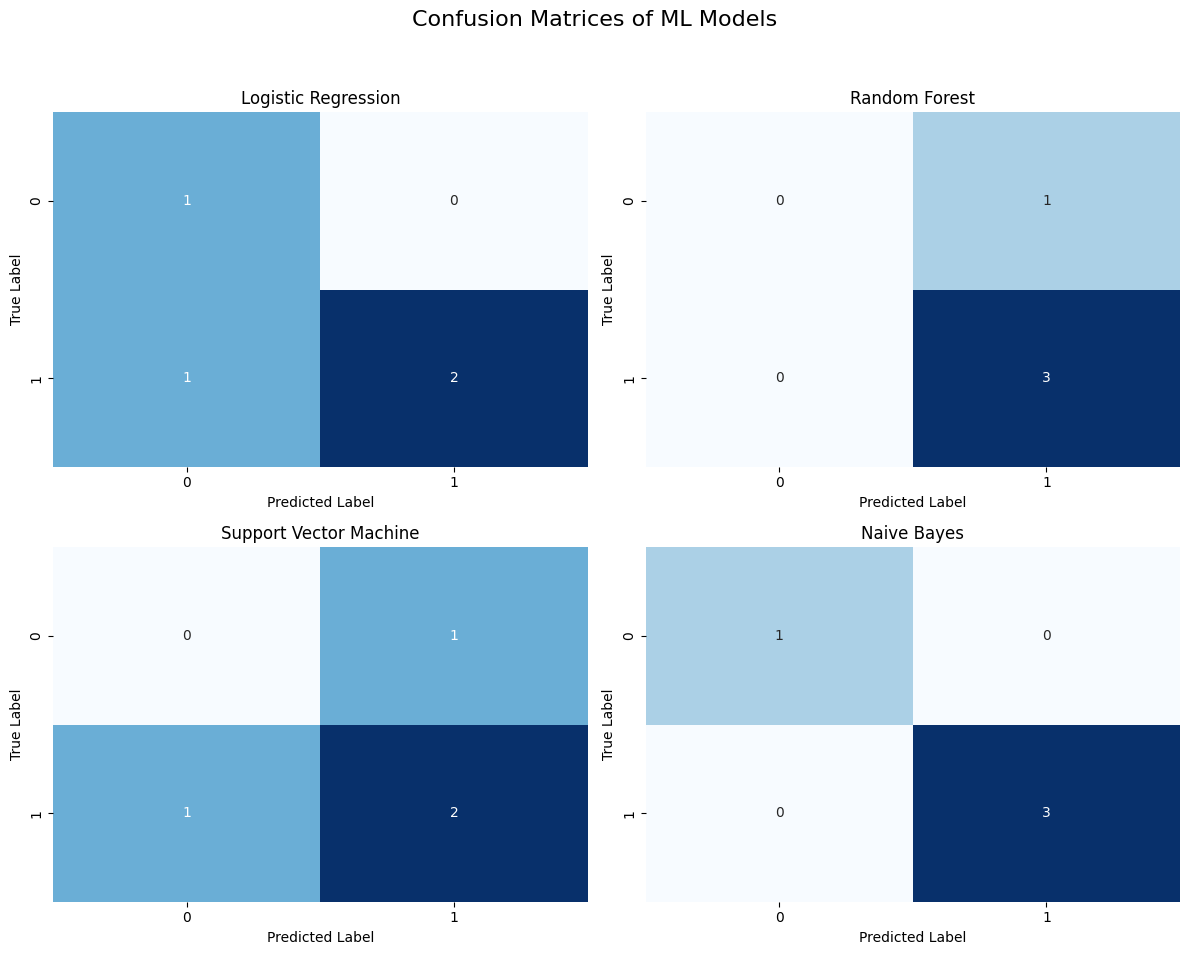

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


model_results = {
    "Logistic Regression": [[1, 0], [1, 2]],
    "Random Forest": [[0, 1], [0, 3]],
    "Support Vector Machine": [[0, 1], [1, 2]],
    "Naive Bayes": [[1, 0], [0, 3]],
}


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Confusion Matrices of ML Models", fontsize=16)


for ax, (model_name, cm) in zip(axes.flatten(), model_results.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False, ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


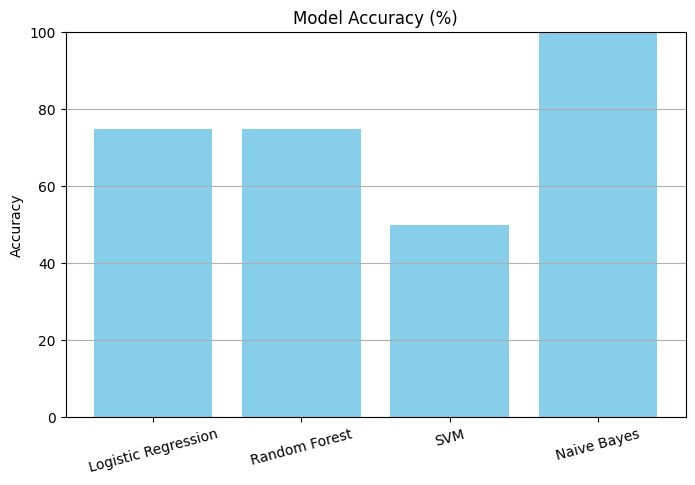

In [19]:
import matplotlib.pyplot as plt

accuracies = {
    "Logistic Regression": 0.75,
    "Random Forest": 0.75,
    "SVM": 0.50,
    "Naive Bayes": 1.00,
}

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), [v * 100 for v in accuracies.values()], color='skyblue')
plt.title("Model Accuracy (%)")
plt.ylabel("Accuracy")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.show()


In [26]:
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your cleaned DataFrame
# and you have columns: 'BP_before_sys', 'BP_after_sys', 'BP_before_dia', 'BP_after_dia'

# Paired t-test
sys_result = ttest_rel(df['D1 Before Pranayama BP Measurment Systolic'], df['D1 After Pranayama BP Measurment Systolic'])
dia_result = ttest_rel(df['D1 Before Pranayama BP Measurment Diastolic'], df['D1 After Pranayama BP Measurment Diastolic'])

print("Systolic BP: p-value =", sys_result.pvalue)
print("Diastolic BP: p-value =", dia_result.pvalue)


Systolic BP: p-value = nan
Diastolic BP: p-value = nan


<ipython-input-27-e2dc97c4b81a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Systolic_BP', data=df_melted, palette='pastel')


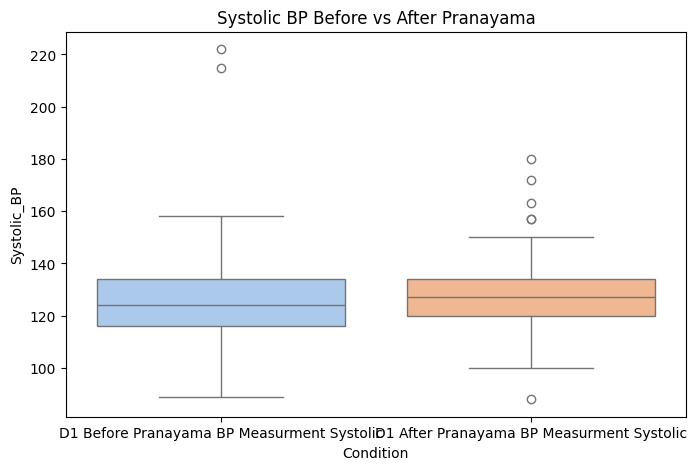

In [27]:
# Combine for plotting
# Updated value_vars to use the correct column names from the DataFrame
df_melted = df.melt(value_vars=['D1 Before Pranayama BP Measurment Systolic', 'D1 After Pranayama BP Measurment Systolic'],
                    var_name='Condition', value_name='Systolic_BP')

plt.figure(figsize=(8, 5))
sns.boxplot(x='Condition', y='Systolic_BP', data=df_melted, palette='pastel')
plt.title("Systolic BP Before vs After Pranayama")
plt.show()